<a href="https://colab.research.google.com/github/brunoprp/neural-network-apresentation/blob/master/CNN_apresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
Image(url= "https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2019/06/dogs_cats.gif?resize=1170%2C658", width=800, height=350)

*   # Classificão de imagens de Gatos e Cães
*   # Rede Neural Convolucional (CNN)
  *   # Tensorflow 2.0 : https://www.tensorflow.org/
  *   # Site da base de dados: https://www.kaggle.com/c/dogs-vs-cats 



#  Analizando o dataset

In [0]:
#importando as bibliotecas
import tensorflow as tf
import os
from tqdm import tqdm_notebook as tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
os.listdir('drive/My Drive/dogs-vs-cats-1')

['sampleSubmission.csv',
 'test1.zip',
 'train.zip',
 'test1',
 '.ipynb_checkpoints',
 'train']

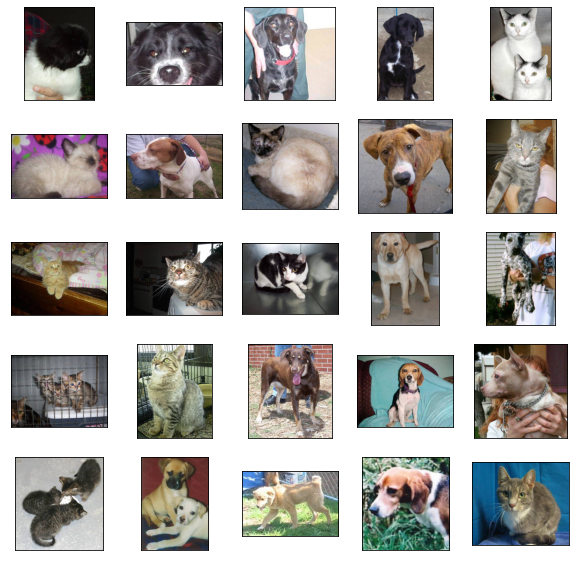

(299, 350, 3)
25000


In [7]:
caminho_data = 'drive/My Drive/dogs-vs-cats-1/train/' # Caminho das imagens de cães e gatos
data_pasta = os.listdir('drive/My Drive/dogs-vs-cats-1/train/') # Criando uma lista com o nome das imagens
data_pasta = random.sample(data_pasta, len(data_pasta)) # Embaralhar diretorio das imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = plt.imread(caminho_data+data_pasta[i]) # Lendo uma imagem do dataset
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()
print(img.shape) # Dimensões da imagem
print(len(data_pasta)) # A quantidate de

# Carregando e pré processando a base de dados

In [0]:
x_train = [] # Imagens de treinamento
x_test = []  # Imagens de teste
y_train = [] # Labels de treinamento
y_test = [] # Labels de teste
data_pasta = random.sample(data_pasta, len(data_pasta)) # Embaralhar diretorio das imagens
cont_train = 0 # controlar o percetual da qunatidade de imagens de treino e teste
cont_test = 0
img_size = 150
for i in tqdm(data_pasta):
  nome_img = i.split('.')[0] # Pegando o nome da imagem (cat,dog)
  img = cv2.imread(caminho_data+i,0)
  img = cv2.resize(img,(img_size,img_size))# 
  img = img.astype('float32')/255 #
  
  if cont_train < 2000: # 70% para treino
    if (nome_img == "cat"): # se nome for cat
        x_train.append(img)
        y_train.append(0)
    else: # se nome for dog
        x_train.append(img)
        y_train.append(1)
    cont_train += 1
  
  elif cont_test < 600: # 30% para teste
      if (nome_img == "cat"): # se nome for cat
        x_test.append(img)
        y_test.append(0)
      else: # se nome for dog
        x_test.append(img)
        y_test.append(1)
      cont_test += 1
  if cont_train == 2000 and cont_test == 600:  # para a leitura
    break


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


# Criando a arquitetura da CNN

In [0]:
model = tf.keras.models.Sequential() # Definindo um modelo sequencial do Tensorflow
input_shape = (img_size,img_size, 1) # Pegando o formado das imagens para a CNN (150, 150, 1)
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu', input_shape= input_shape)) # Primeira camada de convolução
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu')) # Segunda camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'relu')) # Terceira camada de convolução
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'relu')) # Quarta camada de convolução
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2)) # Camada de Pool

# Covolução 2D

In [0]:
Image(url= "https://i.pinimg.com/originals/1e/0b/f3/1e0bf3ad7d8ab1f70e42afa07c7c7d0c.gif", width=600, height=450)

# Camada de Pool

In [0]:
Image(url= "https://miro.medium.com/max/1456/1*WvHC5bKyrHa7Wm3ca-pXtg.gif", width=600, height=350)

# Camadas de Neurônios

In [0]:
number_class = 2 # Numero de classes
model.add(tf.keras.layers.Flatten()) # Camada de Flattem
model.add(tf.keras.layers.Dense(units=128, activation='relu')) # Primmeira camada de neurônios
model.add(tf.keras.layers.Dropout(0.2)) # Desativando 20% dos neurônios

model.add(tf.keras.layers.Dense(units=128, activation='relu')) # Segunda camada de neurônios
model.add(tf.keras.layers.Dropout(0.2)) # Desativando 20% dos neurônios

model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Terceira camada de neurônios
model.add(tf.keras.layers.Dense(units = number_class, activation = 'sigmoid')) # Terceira camada de neurônios
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy']) # comilando o modelo


In [0]:
Image(url= "https://miro.medium.com/max/3000/1*BIpRgx5FsEMhr1k2EqBKFg.gif", width=600, height=350)

# Arquitetura da CNN

In [0]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

# Formato Tensorflow

In [0]:
x_test = np.array(x_test)
x_train = np.array(x_train)
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1) # Formato de entrada da CNN(,sizeImge,sizeImge,channels)
x_train = x_train.reshape(x_train.shape[0], img_size, simg_sizeizeImg, 1)#CNN input format (x,sizeImge,sizeImge,channels)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train, 2)# CNN input format class
y_test = tf.keras.utils.to_categorical(y_test, 2)# CNN input format class

# Treinando e testando a CNN

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Desemenho de treinamneto

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.style.use('seaborn') # stilo do  grafico
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
